# Robintrack Data with Prices

The robintrack.net dataset can be downloaded [here](https://robintrack.net/data-download). The dataset tracks the number of Robinhood users holding a particular stock. However, the dataset does not include prices. In the following notebook I add prices to the data via Yahoo Finance. There are 8000+ stocks available to trade on Robinhood. Not all of those prices are available on Yahoo Finance, but a majority are.  If you find a better option for pricing data other than the Robinhood API please let me know. If you find an interesting patterns in the data please let me know.  

The entire notebook takes around 2 to 3 hours to run with the bulk of the time allocated to downloading prices from Yahoo Finance.

In [2]:
# change directory to where you've downloaded the data
%cd /Users/josephbell/Downloads/tmp8/popularity_export

/Users/josephbell/Downloads/tmp8/popularity_export


In [3]:
# imports
from datetime import datetime
import datetime as dt
import glob
import os
import pandas as pd
import pandas_datareader.data as web

# graphing imports
import chart_studio
from chart_studio.plotly import plot, iplot
import plotly as py
import plotly.tools as tls
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# generates a list of symbols in a python list from the csvs 
stock_list = ['.'.join(filename.split('.')[:-1]) for filename in os.listdir("/Users/josephbell/Downloads/tmp8/popularity_export") 
              if os.path.isfile(os.path.join('/Users/josephbell/Downloads/tmp8/popularity_export', filename))] # change to your path
# sorts the list alphabetically
stock_list.sort()
print(stock_list)
print(len(stock_list))

['A', 'AA', 'AAAU', 'AACAY', 'AACG', 'AADR', 'AAGIY', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAU', 'AAWW', 'AAXJ', 'AAXN', 'AB', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABDC', 'ABEO', 'ABEQ', 'ABEV', 'ABG', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABT', 'ABTX', 'ABUS', 'AC', 'ACA', 'ACAD', 'ACAM', 'ACB', 'ACBI', 'ACC', 'ACCD', 'ACCO', 'ACEL', 'ACER', 'ACES', 'ACGBY', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACHV', 'ACI', 'ACIA', 'ACIO', 'ACIU', 'ACIW', 'ACLS', 'ACM', 'ACMR', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACRE', 'ACRS', 'ACRX', 'ACSAY', 'ACSG', 'ACSI', 'ACST', 'ACT', 'ACTG', 'ACTT', 'ACU', 'ACV', 'ACWF', 'ACWI', 'ACWV', 'ACWX', 'ACY', 'ADAP', 'ADBE', 'ADC', 'ADCT', 'ADDYY', 'ADES', 'ADI', 'ADIL', 'ADM', 'ADMA', 'ADME', 'ADMP', 'ADMS', 'ADNT', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRNY', 'ADRO', 'ADRU', 'ADS', 'ADSK', 'ADSW', 'ADT', 'ADTN', 'ADTX', 'ADUS', 'ADVM', 'ADX', 'ADXN', 'ADXS', 'AE', 'AEE', 'AEF', 'AEGN', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEMD', 'AEO', 'AEP', 

In [5]:
%%time

# clean data
def cleanPopularity(indir='/Users/josephbell/Downloads/tmp8/popularity_export'):
    '''Cleans data by adding a symbol name column, separating the date out,
       and dropping the timestamp.'''
    os.chdir(indir)
    fileList = glob.glob('*')
    for filename in fileList:
        df = pd.read_csv(filename)
        # using csv file name and creating a new column 'Symbol'
        df['Symbol'] = os.path.splitext(os.path.basename(filename))[0]
        # separating date and timestamp
        new = df["timestamp"].str.split(" ", n=1, expand=True)
        df["Date"] = new[0]
        df["Time"] = new[1]
        df.drop(columns=['timestamp'], inplace=True)
        # dropping duplicate dates
        df.drop_duplicates(subset='Date', keep='first', inplace=True)
        df.drop(columns=['Time'], inplace=True)
        df.to_csv('cleaned' + filename, index=False,encoding='utf-8-sig')
cleanPopularity()

CPU times: user 8min 45s, sys: 2min, total: 10min 45s
Wall time: 11min 10s


In [6]:
# check if the data has been properly cleaned
df = pd.read_csv("cleanedAAPL.csv")
df.head()

users_holding Symbol        Date
0         150785   AAPL  2018-05-02
1         145510   AAPL  2018-05-03
2         143747   AAPL  2018-05-04
3         141424   AAPL  2018-05-05
4         141436   AAPL  2018-05-06

In [7]:
%%time
# joins all of the csv files into one dataframe
# set working directory
os.chdir('/Users/josephbell/Downloads/tmp8/popularity_export') # change to your path
# find all csv files in the folder
# use glob pattern matching -> extension = 'csv'
# save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combine all files in the list
popularity_csv = pd.concat([pd.read_csv(f) for f in all_filenames], sort=True)
# export to csv
popularity_csv.to_csv( "popularity_data.csv", index=False, encoding='utf-8-sig')

CPU times: user 8min 22s, sys: 2min 42s, total: 11min 5s
Wall time: 17min 45s


In [8]:
# check shape and head of the combined dataframe
print(popularity_csv.shape)
popularity_csv.head()

(147501049, 4)


Date Symbol timestamp  users_holding
0  2018-05-02    OAS       NaN         1524.0
1  2018-05-03    OAS       NaN         1517.0
2  2018-05-04    OAS       NaN         1522.0
3  2018-05-05    OAS       NaN         1520.0
4  2018-05-06    OAS       NaN         1520.0

In [9]:
%%time
# drop timestamp column
popularity_csv.drop('timestamp', axis=1, inplace=True)
print(popularity_csv.shape)
popularity_csv.head()

(147501049, 3)
CPU times: user 49 s, sys: 3min 43s, total: 4min 32s
Wall time: 14min 9s


Date Symbol  users_holding
0  2018-05-02    OAS         1524.0
1  2018-05-03    OAS         1517.0
2  2018-05-04    OAS         1522.0
3  2018-05-05    OAS         1520.0
4  2018-05-06    OAS         1520.0

In [10]:
%%time
# drop null values
popularity_csv = popularity_csv.dropna()
print(popularity_csv.shape)
popularity_csv.head()

(5821323, 3)
CPU times: user 12.2 s, sys: 9.57 s, total: 21.8 s
Wall time: 28.1 s


Date Symbol  users_holding
0  2018-05-02    OAS         1524.0
1  2018-05-03    OAS         1517.0
2  2018-05-04    OAS         1522.0
3  2018-05-05    OAS         1520.0
4  2018-05-06    OAS         1520.0

# Fetch Pricing Data from Yahoo Finance
The start date is the earliest date that robintrack.net began collecting data. Don't forget to change the end date to the most recent trading day. You can change the stock list to be a small list of stocks of your choosing, but I like to look at the dataset as a whole. You can also get more data from Yahoo Finance, but I just chose to get the close and volume figures. 

In [11]:
%%time

def get_stock_data():
    '''Fetches closing prices for specified stocks from Yahoo Finance,
       stored in a csv file in a new directory labeled pricedata.
       Prints each stock or an error as it completes.'''
    tickers = stock_list # list of stocks i.e. ['AAPL', 'GOOG', 'FB']

    start = dt.datetime(2018, 5, 2)
    end = dt.datetime(2020, 8, 4) # change date to most recent trading day

    if not os.path.exists('pricedata'):
        os.makedirs('pricedata')

    for ticker in tickers:
        print(ticker)
        try : 
            df = web.DataReader(ticker, 'yahoo', start, end).drop(['High','Low','Open','Adj Close'], axis=1)
            df['Symbol'] = ticker 
            print(df.head())
            df.to_csv('pricedata/{}.csv'. format(ticker))
            print(ticker, 'downloaded')
        except Exception as e: 
            print(e, 'error')

print(get_stock_data())

A
                Close     Volume Symbol
Date                                   
2018-05-02  65.910004  2240500.0      A
2018-05-03  66.339996  2365900.0      A
2018-05-04  67.000000  1330800.0      A
2018-05-07  67.389999  1468700.0      A
2018-05-08  67.370003  1916100.0      A
A downloaded
AA
                Close   Volume Symbol
Date                                 
2018-05-02  53.070000  3375500     AA
2018-05-03  53.279999  4050800     AA
2018-05-04  54.389999  2598700     AA
2018-05-07  54.549999  3891600     AA
2018-05-08  53.759998  2756100     AA
AA downloaded
AAAU
            Close  Volume Symbol
Date                            
2018-08-15  11.74   27300   AAAU
2018-08-16  11.74  428400   AAAU
2018-08-17  11.82   52400   AAAU
2018-08-20  11.90   28700   AAAU
2018-08-21  11.93   30600   AAAU
AAAU downloaded
AACAY
            Close    Volume Symbol
Date                              
2018-05-02  14.29  242800.0  AACAY
2018-05-03  14.47   99400.0  AACAY
2018-05-04  14.39   3310

In [12]:
%%time
# joins all price data csvs into one
# set working directory
os.chdir('/Users/josephbell/Downloads/tmp8/popularity_export/pricedata') # change to your path
# find all csv files in the folder
# use glob pattern matching -> extension = 'csv'
# save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combine all files in the list
pricing_data = pd.concat([pd.read_csv(f) for f in all_filenames])

CPU times: user 16.8 s, sys: 3.36 s, total: 20.1 s
Wall time: 26.6 s


In [13]:
# check if pricing data csvs have been merged
print(pricing_data.shape)
pricing_data.tail()

(3352972, 4)


Date      Close     Volume Symbol
528  2020-06-08  27.080000   614207.0    KEM
529  2020-06-09  27.190001  1079726.0    KEM
530  2020-06-10  27.190001  2578743.0    KEM
531  2020-06-11  27.190001   974684.0    KEM
532  2020-06-12  27.209999  2082267.0    KEM

# Merge Pricing Data from Yahoo Finance with Popularity Data from robintrack.net

In [16]:
%%time
# merging the popularity data with pricing data on symbol and date
users_prices = pricing_data.merge(popularity_csv, how ='inner', on = ('Symbol', 'Date'))
print(users_prices.shape)
users_prices.head()

(2994457, 5)
CPU times: user 3.3 s, sys: 1.19 s, total: 4.49 s
Wall time: 4.1 s


Date      Close    Volume Symbol  users_holding
0  2018-05-02  20.766962   36100.0    RIV           65.0
1  2018-05-03  20.737463   23700.0    RIV           65.0
2  2018-05-04  20.619469   54600.0    RIV           64.0
3  2018-05-07  20.678467  103400.0    RIV           64.0
4  2018-05-08  20.570305   25200.0    RIV           63.0

In [17]:
# how many stocks did we actually get prices for?
users_prices['Symbol'].nunique()

6483

# Recreate the robintrack.net graphs
Note: these graphs aren't exactly the same because robintrack.net collects multiple price points a day and we've only gathered closing prices. 

     index        Date       Close      Volume Symbol  users_holding
0  2725193  2018-05-02  176.570007  66539400.0   AAPL       150785.0
1  2725194  2018-05-03  176.889999  34068200.0   AAPL       145510.0
2  2725195  2018-05-04  183.830002  56201300.0   AAPL       143747.0
3  2725196  2018-05-07  185.160004  42451400.0   AAPL       141437.0
4  2725197  2018-05-08  186.050003  28402800.0   AAPL       141179.0


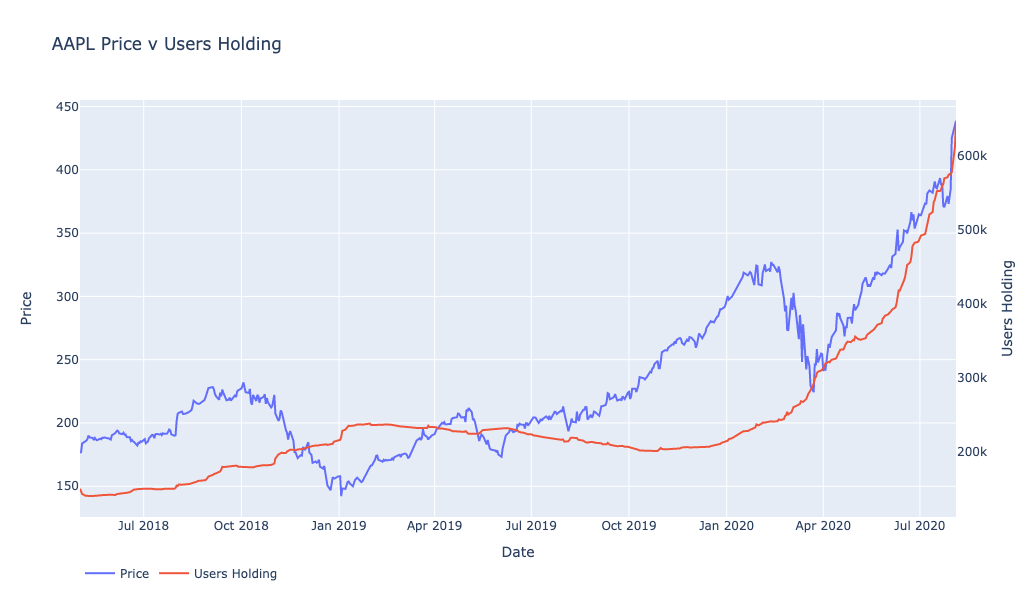

                  index     Close    Volume  users_holding
index          1.000000  0.798997  0.191027       0.764709
Close          0.798997  1.000000  0.134328       0.771753
Volume         0.191027  0.134328  1.000000       0.202201
users_holding  0.764709  0.771753  0.202201       1.000000


In [18]:
# recreate robintrack.net graph comparing price and users holding
chart_studio.tools.set_credentials_file(username='', api_key='') # enter your own credentials here

def robinhood_data(ticker):
    '''Display the ticker's head, a plotly graph reproducing the graph from Robintrack.net and 
       a correlation matrix showing correlation between price, users holding,
       and volume data points'''
    ticker_data = users_prices[users_prices.values == ticker]
    ticker_data.reset_index(inplace=True)
    print(ticker_data.head())
    price_data = go.Scatter(x=ticker_data['Date'], y=ticker_data['Close'],
                          name='Price')
    users_data = go.Scatter(x=ticker_data['Date'], y=ticker_data['users_holding'],
                          yaxis='y2', name='Users Holding')
    layout = go.Layout(height=600, width=1000, 
                     title=ticker + ' Price v Users Holding',
                     xaxis=dict(title='Date'), yaxis=dict(title='Price'),
                     yaxis2=dict(title='Users Holding', showgrid=False, 
                                 overlaying='y', side='right'),
                                 legend_orientation='h')
    fig = go.Figure(data=[price_data, users_data], layout=layout)
    fig.show()
    print(ticker_data.corr())
# enter a ticker here to change graphs
robinhood_data('AAPL')

# Explore!
Do what you want with the data and don't forget to let me know what you discover!